In [111]:
#error function: calculuate cross entropy
#mean squared error is used for linear regression

#weights: relative importances of features
#bais: "shift"/location of the activation function
#activiation function is sigmoid

import numpy as np

In [112]:
#learning rate for gradient descent
#explain why you needa hyperparameter tune this
LR = 0.0015

#number of random starting points to take
n_iters = 100

#number of steps to take in GD
n_steps = 1000

#feature inputs -> dotted weights, + bias -> y = sigmoid(x) -> find_loss(y)

#we can write in terms of wegiths and biases (substitute into the find loss function)
#feature inputs -> dotted weights, + bias -> y = sigmoid(x) -> find_loss(y) -> 

weights, biases = 0, 0

In [113]:
#Tanh, ReLU (less computation time)
#Why choose sigmoid?

#Activation function: 
def sigmoid(x):
    """
    Computes sigmoid function to calculate probability based on single-value output of logistic regression
    and predictions. 
    Input: Computed prediction value
    Returns: scalar probability between (0, 1)
    """
    return 1.0/(1.0 + np.exp(-x))

def cross_entropy(predictions, targets, epsilon = 1e-14):
    """
    Computes cross entropy between predicted probabilities and actual 0/1 classifications. 
    Input: predictions vector of predicted classes' probabilities
           targets vector of actual 0/1 classes
    Returns: scalar representing loss
    """
    n = predictions.shape[0]
    return -(1/n) * np.sum(targets*np.log(predictions + epsilon) + (1-targets)*np.log(1 - predictions + epsilon))

#E'(weights, biases)
#Other activation function and their derivatives given here: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
def calc_dir(x, bias, predicted, actual):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: weights = coefficients for features
           bias = single-value added to prediction output     
           predicted = predicted 0/1 classes for classification output
           actual = actual 0/1 classes for classification output
    Returns: tuple of 2 elements
             gradient descent vector <dw, db> = vector of greatest descent for weights and biases, respectively
    """
    N = len(weights)

    dW = (1/N) * 2 * np.dot(x.T, predicted - actual)
    dB = (1/N) * 2 * np.sum(predicted - actual)

    return [dW, dB]

In [114]:
def gradient_descent(weights, bias, x, y, LR, report=False):
    """
    Performs gradient descent to optimize initial starting weight and biases
    
    Input: x = training set containing input features
           y = training set containing expected classification
           weights = n-d vector/numpy_array
           bias = scalar
           LR = scalar, learning rate
    Returns: tuple of 2 elements, (weights, bias)
    """
    
    for i in range(n_steps):
        #for each row of features, we generate a corresponding number by multiplying each weight by feature value
        predicted_vals = np.dot(x, weights.T) + bias
        
        #for each feature value, we predict its class probability utilizing the sigmoid function
        predicted_probs = sigmoid(predicted_vals)

        if report:
            print("On step " + str(i) + "th step, loss equals " + str(cross_entropy(predicted_probs, y)))
        
        #calculated derivatives
        derivs = calc_dir(x, bias, predicted_probs, y)
        dW = derivs[0]
        dB = derivs[1]
        
        #"descent" down
        weights -= LR * dW
        bias -= LR * dB
        
    return [weights, bias]

In [194]:
def train(x, y, report = False):
    """
    Optimizes weights and biases given initial training set. Utilizes entire training set (must train-test-split beforehand)
    
    Input: x = model input of training dataset, 2darray containing m samples (entries) and n features
           y = expected model output of training dataset, 1darray containing n classification results (0/1)

    """
    global weights, bias
    m, n = x.shape
    
    #we take n_iters random starting points
    for _ in range(n_iters):
        #random starting points: vector/np_array of size n
        weights = np.random.rand(n) * 10
        #random starting points: random bias
        bias = np.random.rand(1)[0]

        res = gradient_descent(weights, bias, x, y, LR, report)
        weights = res[0]
        bias = res[1]
        

In [195]:
def predict_probs(x):
    """
    Utilizes pre-optimized weights and biases to outputs class probability given m entries of nd-vector of features
    
    Input: m by n matrix of feature
    Output: m-d vector of class probabilities for each entry
    """
    predicted_vals = np.dot(x, weights.T) + bias
    predicted_probs = sigmoid(predicted_vals)
    
    return predicted_probs


def predict(x):
    """
    Utilizes pre-optimized weights and biases to outputs class given m entries of nd-vector of features
    
    Input: m by n matrix of feature
    Output: m-d vector of 0/1 class for each entry
    """

    x = predict_probs(x)

    x = [0 if i < 0.5 else 1 for i in x]
    return x

In [196]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

data = load_breast_cancer()
x, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

train(x_train, y_train)

y_pred = predict(x_test)
print(len(y_pred))
print(y_test.shape)
print(accuracy_score(y_test, y_pred))

<ipython-input-113-874f6cf9979a>:12: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


114
(114,)
0.9210526315789473


<AxesSubplot:>

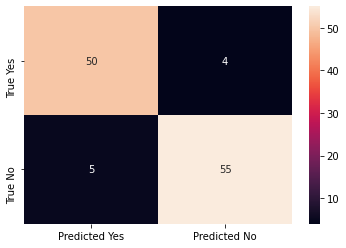

In [198]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = ['True Yes', 'True No'],
                  columns = ['Predicted Yes', 'Predicted No'])

plt.figure()
sn.heatmap(df_cm, annot=True)